In [1]:
import os
import re
import glob
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

In [2]:
#TrainConMSE = np.load("/home/77462217B/lois/ADMeth/outcomes/griddatasetoutcomes/ValidateDataset5K_float16/ValidateDataset5K_float16_mse_per_sample_per_position.npy")
#MicMSE = np.load("/home/77462217B/lois/ADMeth/outcomes/griddatasetoutcomes/Michaud_float16/Michaud_float16_mse_per_sample_per_position.npy")
#FraCon= np.load("/home/77462217B/lois/ADMeth/outcomes/griddatasetoutcomes/FraCon_float16/FraCon_float16_mse_per_sample_per_position.npy")
#FraCas= np.load("/home/77462217B/lois/ADMeth/outcomes/griddatasetoutcomes/FraCas_float16/FraCas_float16_mse_per_sample_per_position.npy")

pdMic=pd.read_csv("/mnt/hydra/ubs/shared/users/Lois/DatasetsControles/OnlyMichaud/pdMichaud.txt", sep=",")

In [23]:
(pdMic["YearsToDiagnosis"]<=3).mean()*824

np.float64(26.0)

In [24]:
MSEMic= pd.DataFrame(np.load("/home/77462217B/lois/AAImageneAnomalyDetection/outcomes/MSE/heavymodelv1/Michaud_float16/Michaud_float16_mse_per_sample_per_position.npy"))

In [ ]:
MSEMic.iloc[np.array(pdMic["YearsToDiagnosis"]<=3),:]

/home/77462217B/.local/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,0,1,2,3,4,5,6,7,8,9,...,319990,319991,319992,319993,319994,319995,319996,319997,319998,319999
1,0.000029,6.890297e-05,0.044922,0.003637,0.001931,0.000086,0.028381,0.282715,0.000185,5.632639e-05,...,2.384186e-07,1.270294e-03,0.000115,2.384186e-07,7.743835e-04,0.007217,9.460449e-04,0.001341,2.884865e-05,7.569790e-06
15,0.000663,9.164810e-04,0.034973,0.003937,0.003784,0.000381,0.029205,0.016113,0.000253,4.303455e-05,...,1.931190e-05,3.318787e-03,0.000086,1.888275e-03,4.875183e-03,0.001039,4.205704e-04,0.000077,2.384186e-07,5.960464e-08
40,0.000446,2.384186e-05,0.029205,0.006771,0.000019,0.001888,0.018829,0.040375,0.000218,3.737211e-05,...,5.364418e-05,3.606796e-03,0.002678,1.869202e-04,1.007080e-03,0.003098,1.525879e-03,0.001488,2.145767e-06,7.927418e-06
108,0.037018,8.606911e-05,0.000244,0.001236,0.010818,0.001341,0.000077,0.003519,0.000021,2.384186e-07,...,6.890297e-05,6.890297e-05,0.004028,1.340866e-03,1.738071e-04,0.003098,2.937317e-03,0.001377,4.673004e-05,1.990795e-05
131,0.006699,5.493164e-04,0.203613,0.002174,0.018692,0.000946,0.024261,0.157471,0.000229,2.956390e-05,...,6.103516e-05,7.743835e-04,0.002678,9.164810e-04,2.920628e-04,0.005802,4.029274e-05,0.000086,3.433228e-05,5.960464e-07
159,0.000596,3.814697e-04,0.020752,0.001135,0.013275,0.005081,0.020615,0.058411,0.000211,1.657009e-05,...,1.051426e-04,8.606911e-05,0.000887,4.219055e-03,1.261234e-04,0.004944,4.029274e-05,0.000012,2.145767e-06,1.764297e-05
203,0.014992,2.937317e-03,0.000441,0.001603,0.018295,0.013847,0.000309,0.000132,0.000081,0.000000e+00,...,6.103516e-05,7.724762e-05,0.007301,2.291203e-04,9.536743e-05,0.002106,1.373291e-04,0.001451,1.490116e-04,1.633167e-05
233,0.012558,4.029274e-05,0.071594,0.000318,0.000126,0.000004,0.035889,0.092163,0.000185,3.391504e-05,...,5.960464e-06,2.197266e-03,0.018036,4.827976e-04,0.000000e+00,0.007053,9.536743e-05,0.001603,6.890297e-05,1.192093e-07
247,0.000510,3.442764e-04,0.028381,0.013168,0.003153,0.000504,0.037781,0.020172,0.000225,7.420778e-05,...,1.153946e-04,1.888275e-03,0.005436,4.007816e-04,1.168251e-05,0.002106,4.673004e-05,0.001451,1.611710e-04,7.987022e-06
270,0.006569,1.525879e-05,0.003319,0.007683,0.000596,0.000244,0.006889,0.001516,0.000189,5.555153e-05,...,1.931190e-05,3.442764e-04,0.001070,1.007080e-03,2.145767e-06,0.000946,9.536743e-07,0.000105,4.673004e-05,2.884865e-05


In [11]:
def group_columns_by_mean(data, group_size: int = 10, fill_value: float = 1.0):
    if isinstance(data, np.ndarray):
        df = pd.DataFrame(data).astype(float)
    elif isinstance(data, pd.DataFrame):
        df = data.copy().astype(float)
    else:
        raise TypeError("El input debe ser un pandas.DataFrame o un numpy.ndarray.")

    if group_size < 1:
        raise ValueError("group_size debe ser >= 1")

    n_cols = df.shape[1]

    # Missing común: NaN OR == 0 OR == -1 (exactos)
    missing_mask = df.isna() | (df == 0) | (df == -1)

    if group_size == 1:
        return df.mask(missing_mask, fill_value)

    pre = df.mask(missing_mask, np.nan)

    grouped_cols = []
    for start in range(0, n_cols, group_size):
        end = min(start + group_size, n_cols)
        subset = pre.iloc[:, start:end]

        # Media por fila ignorando NaNs
        group_mean = subset.mean(axis=1, skipna=True)

        # Si todas las columnas del grupo son missing -> usar fill_value
        all_missing = subset.isna().all(axis=1)
        group_mean = group_mean.mask(all_missing, fill_value)

        grouped_cols.append(group_mean)

    # Concatenar resultados (una columna por grupo)
    grouped_matrix = pd.concat(grouped_cols, axis=1)
    return grouped_matrix



In [12]:
FraCasMSE = group_columns_by_mean(FraCas, group_size=1)
TrainConMSE = group_columns_by_mean(TrainConMSE, group_size=1)
FraConMSE = group_columns_by_mean(FraCon, group_size=1)
MicMSE = group_columns_by_mean(MicMSE, group_size=1)


In [13]:
TrainConMSE.min().min()

np.float64(5.960464477539063e-08)

In [14]:
keep = (pdMic["Status"]==0)
keep = keep.to_numpy()
MicConMSE = MicMSE.iloc[keep,:]
pdMicCon = pdMic.iloc[keep,:]

keep = (pdMic["Status"]==1)
keep = keep.to_numpy()
MicCasMSE = MicMSE.iloc[keep,:]
pdMicCas = pdMic.iloc[keep,:]

keep = (pdMicCas["YearsToDiagnosis"]<=5)
keep = keep.to_numpy()
Mic5CasMSE = MicCasMSE.iloc[keep,:]

keep = (pdMicCas["YearsToDiagnosis"]<=3) 
keep = keep.to_numpy()
Mic3CasMSE = MicCasMSE.iloc[keep,:]

keep = (pdMicCas["YearsToDiagnosis"]>10)
keep = keep.to_numpy()
MicM10CasMSE = MicCasMSE.iloc[keep,:]

keep = (pdMicCas["YearsToDiagnosis"]<=10) & (pdMicCas["YearsToDiagnosis"]>5)
keep = keep.to_numpy()
Mic10CasMSE = MicCasMSE.iloc[keep,:]

In [ ]:
MicMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/StdPlus1ScoreMicMSE.csv', index=False)
MicConMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/StdPlus1ScoreMicConMSE.csv', index=False)
MicCasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/StdPlus1ScoreMicCasMSE.csv', index=False)
Mic5CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/StdPlus1ScoreMic5CasMSE.csv', index=False)
Mic3CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/StdPlus1ScoreMic3CasMSE.csv', index=False)
MicM10CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/StdPlus1ScoreMicM10CasMSE.csv', index=False)
Mic10CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/StdPlus1ScoreMic10CasMSE.csv', index=False)

MSE Analysis

In [15]:
def BackgroundNormalization(ErrorsMatrix):
    BCErrorsMatrix={}
    for i in range(ErrorsMatrix.shape[0]):
        #BCErrorsMatrix[i] = ErrorsMatrix.loc[i,:]/(ErrorsMatrix.loc[i,:].mean())
        BCErrorsMatrix[i] = ErrorsMatrix.iloc[i,:]/(ErrorsMatrix.iloc[i,:].median())
    BCErrorsMatrix = pd.DataFrame(BCErrorsMatrix).T
    return BCErrorsMatrix

In [16]:
BCTrainConMSE =  BackgroundNormalization(TrainConMSE)
FraConMSE = BackgroundNormalization(FraConMSE)
FraCasMSE = BackgroundNormalization(FraCasMSE)

MicMSE = BackgroundNormalization(MicMSE)
MicConMSE = BackgroundNormalization(MicConMSE)
MicCasMSE = BackgroundNormalization(MicCasMSE)
Mic5CasMSE = BackgroundNormalization(Mic5CasMSE)
Mic3CasMSE = BackgroundNormalization(Mic3CasMSE)
MicM10CasMSE = BackgroundNormalization(MicM10CasMSE)
Mic10CasMSE = BackgroundNormalization(Mic10CasMSE)

In [17]:
print(MicCasMSE.max().max())
print(BCTrainConMSE.mean(axis=0).min().min())

9269.186061801447
1.281878796822022


In [18]:
(BCTrainConMSE.mean(axis=0)).min().min()

np.float64(1.281878796822022)

In [19]:
def ScoreRegion(BCErrorsMatrix, BCErrorsMatrixControls):
    ScoreMatrix=((BCErrorsMatrix-BCErrorsMatrixControls.mean(axis=0))/(BCErrorsMatrixControls.std(axis=0)+1))
    return ScoreMatrix

In [20]:
MicMSE = ScoreRegion(MicMSE, BCTrainConMSE)
FraConMSE = ScoreRegion(FraConMSE, BCTrainConMSE)
FraCasMSE = ScoreRegion(FraCasMSE, BCTrainConMSE)

MicConMSE = ScoreRegion(MicConMSE, BCTrainConMSE)
MicCasMSE = ScoreRegion(MicCasMSE, BCTrainConMSE)
Mic5CasMSE = ScoreRegion(Mic5CasMSE, BCTrainConMSE)
Mic3CasMSE = ScoreRegion(Mic3CasMSE, BCTrainConMSE)
MicM10CasMSE = ScoreRegion(MicM10CasMSE, BCTrainConMSE)
Mic10CasMSE = ScoreRegion(Mic10CasMSE, BCTrainConMSE)

In [21]:
MicMSE.max().max()

np.float64(368.2589092029136)

In [22]:
FraConMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreFraConMSE.csv', index=False)
FraCasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreFraCasMSE.csv', index=False)

MicMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreMicMSE.csv', index=False)
MicConMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreMicConMSE.csv', index=False)
MicCasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreMicCasMSE.csv', index=False)
Mic5CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreMic5CasMSE.csv', index=False)
Mic3CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreMic3CasMSE.csv', index=False)
MicM10CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreMicM10CasMSE.csv', index=False)
Mic10CasMSE.to_csv('/home/77462217B/lois/ADMeth/outcomes/MRS/gridsearchv1/All/MedStdPlus1ScoreMic10CasMSE.csv', index=False)

In [20]:
MicMSE.max().max()

np.float16(inf)

In [ ]:
def DiffControls(BCErrorsMatrix, BCErrorsMatrixControls):
    DiffErrorsMatrix=((BCErrorsMatrix.mean(axis=0)-BCErrorsMatrixControls.mean(axis=0))/BCErrorsMatrixControls.mean(axis=0))
    return DiffErrorsMatrix

In [55]:
DiffMicConMSE = DiffControls(BCMicConMSE, BCMicConMSE)
DiffMicCasMSE = DiffControls(BCMicCasMSE, BCMicConMSE)
DiffMic5CasMSE = DiffControls(BCMic5CasMSE, BCMicConMSE)
DiffMic3CasMSE = DiffControls(BCMic3CasMSE, BCMicConMSE)
DiffMic10CasMSE = DiffControls(BCMic10CasMSE, BCMicConMSE)
DiffMicM10CasMSE = DiffControls(BCMicM10CasMSE, BCMicConMSE)

In [60]:
DiffMicCasMSE

0       0.037109
1       0.067505
2       0.009682
3       0.027893
4       0.050262
          ...   
3195    0.022644
3196   -0.006954
3197    0.044617
3198   -0.206543
3199   -0.054718
Length: 3200, dtype: float16

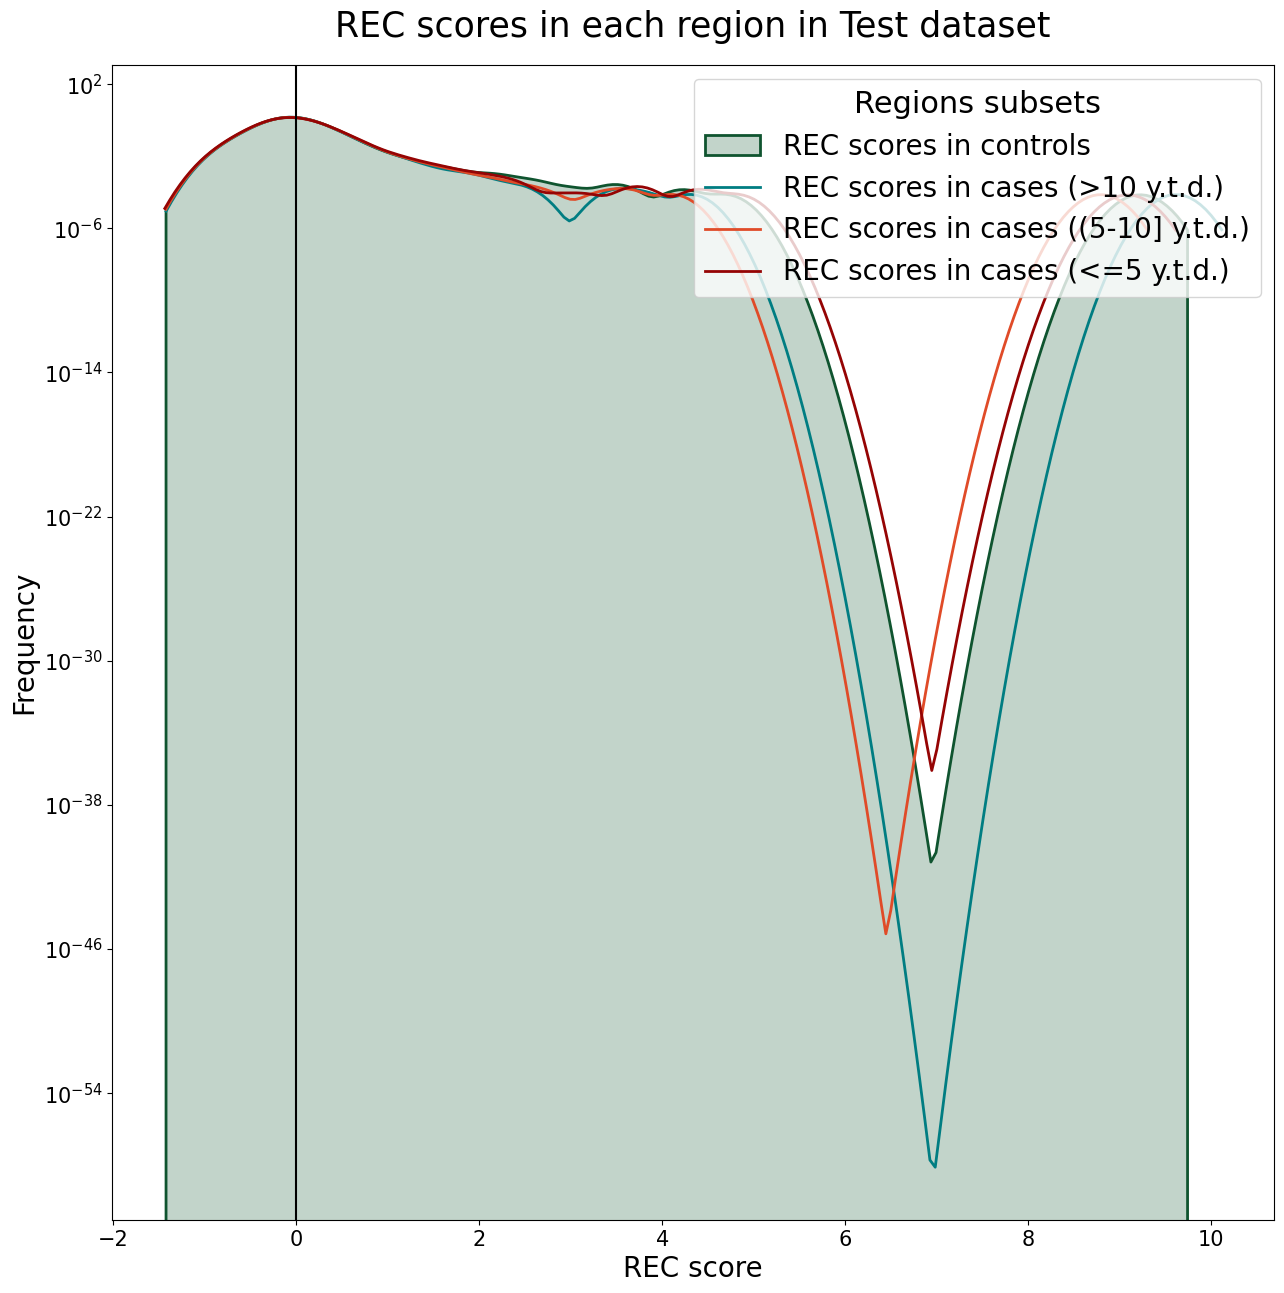

In [77]:
kwargs = dict(histtype='stepfilled', alpha=0, density=True, bins=100, ec="k")

plt.figure(figsize=(15,15))
#plt.xlim(xmin=-2, xmax = 5)
#plt.ylim(ymin=0.0001, ymax = 0.05)
plt.set_cmap('tab20c')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('REC score', fontsize=20)
plt.title('REC scores in each region in Test dataset', fontsize=25, pad=20)
sns.kdeplot(data=ScoreMicConMSE.mean(), color="#0F542FFF", fill=True, linewidth = 2, bw_adjust=5)
sns.kdeplot(data=ScoreMicM10CasMSE.mean(), color="#007D82FF", fill=False, linewidth = 2, bw_adjust=5)
sns.kdeplot(data= ScoreMic10CasMSE.mean(), fill = False , color = "#E04B28FF", linewidth = 2, bw_adjust=5)
sns.kdeplot(data=ScoreMic5CasMSE.mean(), color="#950404FF", fill=False, linewidth = 2, bw_adjust=5)
legend=plt.legend(title='Regions subsets', fontsize=30, loc='upper right', labels=['REC scores in controls', 'REC scores in cases (>10 y.t.d.)', 'REC scores in cases ((5-10] y.t.d.)', 'REC scores in cases (<=5 y.t.d.)'], prop={'size': 20})
legend.get_title().set_fontsize('22') 
ax = plt.gca()
ax.axvline(x=0, color='k')
ax.tick_params(labelsize=15)
plt.yscale('log')

#plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/REChistogram.png")

plt.show()

In [78]:
print("Global MSE in Michaud Controls          " + "Mean: " + '%.4f' % MicConMSE.mean().mean()+ "   Skewness: " +'%.3f' %MicConMSE.mean().skew())
print("Global MSE in Michaud Cases             " + "Mean: " + '%.4f' % MicCasMSE.mean().mean()+ "   Skewness: " +'%.3f' %MicCasMSE.mean().skew())
print("Global MSE in Michaud Cases - >10 ytd:  " + "Mean: " + '%.4f' % MicM10CasMSE.mean().mean()+ "   Skewness: " +'%.3f' %MicM10CasMSE.mean().skew()) 
print("Global MSE in Michaud Cases - 10-5 ytd: " + "Mean: " + '%.4f' % Mic10CasMSE.mean().mean()+ "   Skewness: " +'%.3f' %Mic10CasMSE.mean().skew()) 
print("Global MSE in Michaud Cases - <=5 ytd:  " + "Mean: " + '%.4f' % Mic5CasMSE.mean().mean()+ "   Skewness: " +'%.3f' %Mic5CasMSE.mean().skew()) 

print("\nGlobal REC in Michaud Controls          " + "Mean: " + '%.3f' % ScoreMicConMSE.mean().mean()+ "  Skewness: " +  '%.3f' % ScoreMicConMSE.mean().skew())
print("Global REC in Michaud Cases             " + "Mean: " + '%.3f' % ScoreMicCasMSE.mean().mean()+ "   Skewness: " +  '%.3f' % ScoreMicCasMSE.mean().skew())
print("Global REC in Michaud Cases - >10 ytd:  " + "Mean: " + '%.3f' % ScoreMicM10CasMSE.mean().mean()+ "   Skewness: " +  '%.3f' % ScoreMicM10CasMSE.mean().skew())
print("Global REC in Michaud Cases - 10-5 ytd: " + "Mean: " + '%.3f' % ScoreMic10CasMSE.mean().mean()+ "   Skewness: " +  '%.3f' % ScoreMic10CasMSE.mean().skew()) 
print("Global REC in Michaud Cases - <=5 ytd:  " + "Mean: " + '%.3f' % ScoreMic5CasMSE.mean().mean()+ "   Skewness: " +  '%.3f' % ScoreMic5CasMSE.mean().skew()) 

Global MSE in Michaud Controls          Mean: 0.0014   Skewness: 2.485
Global MSE in Michaud Cases             Mean: 0.0014   Skewness: 2.446
Global MSE in Michaud Cases - >10 ytd:  Mean: 0.0013   Skewness: 2.491
Global MSE in Michaud Cases - 10-5 ytd: Mean: 0.0014   Skewness: 2.404
Global MSE in Michaud Cases - <=5 ytd:  Mean: 0.0014   Skewness: 2.410

Global REC in Michaud Controls          Mean: -0.036  Skewness: 3.045
Global REC in Michaud Cases             Mean: -0.037   Skewness: 2.640
Global REC in Michaud Cases - >10 ytd:  Mean: -0.037   Skewness: 2.743
Global REC in Michaud Cases - 10-5 ytd: Mean: -0.037   Skewness: 2.353
Global REC in Michaud Cases - <=5 ytd:  Mean: -0.038   Skewness: 2.779


In [24]:
pdMicCas

,Study,Platform,ID,Sample,Position,QC,Sex,Age,Race,Status,YearsToDiagnosis,Cohort
2,Michaud,EPIC,3041820,201233770101_R02C01,R02C01,0.000384,Female,64,White,1,3,NHS
7,Michaud,EPIC,3041935,201236470068_R01C01,R01C01,0.000264,Male,67,White,1,10,PHS
10,Michaud,EPIC,3042057,201236470068_R06C01,R06C01,0.000283,Male,41,White,1,20,PHS
12,Michaud,EPIC,3041686,201236470161_R01C01,R01C01,0.000378,Female,64,White,1,5,NHS
16,Michaud,EPIC,3041868,201236470161_R05C01,R05C01,0.000381,Female,68,White,1,3,NHS
...,...,...,...,...,...,...,...,...,...,...,...,...
814,Michaud,EPIC,3041278,203038300095_R05C01,R05C01,0.000114,Male,61,White,1,15,HPFS
816,Michaud,EPIC,3041319,203038300095_R07C01,R07C01,0.000247,Male,51,White,1,15,HPFS
817,Michaud,EPIC,3041360,203038300095_R08C01,R08C01,0.000176,Male,59,White,1,21,HPFS
819,Michaud,EPIC,3041465,203041560027_R02C01,R02C01,0.000125,Male,70,White,1,20,HPFS


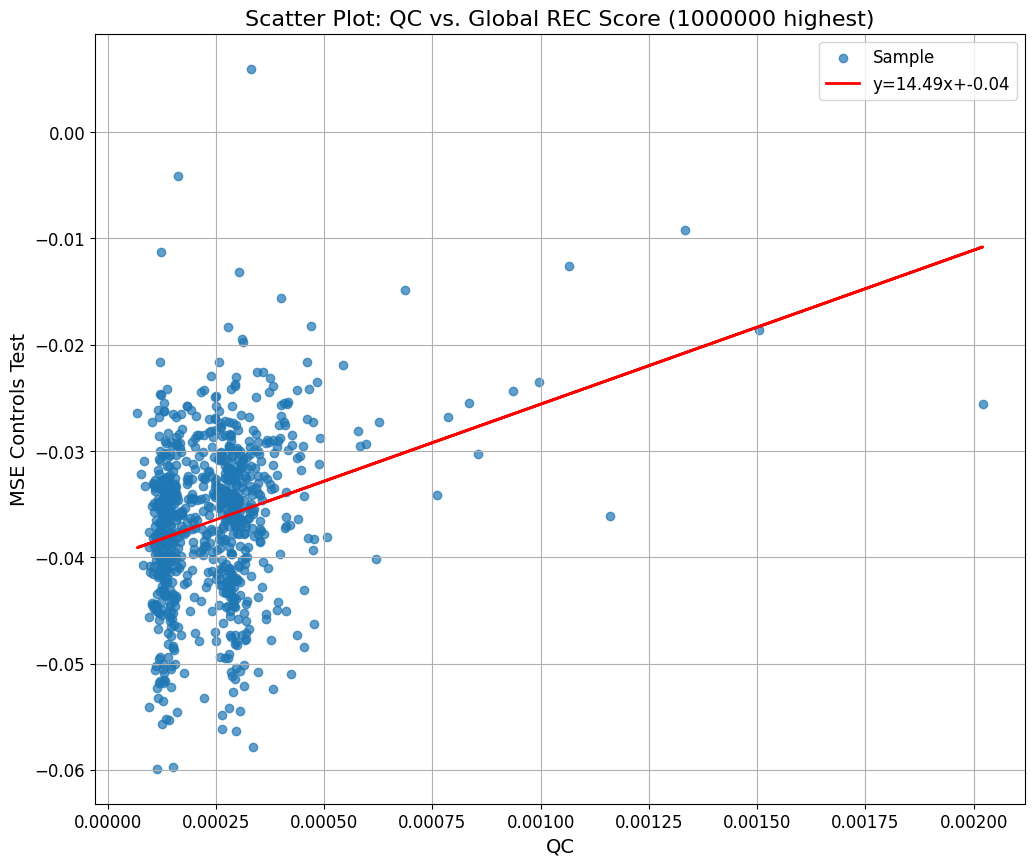

In [79]:
# keep = pdMicCas["YearsToDiagnosis"]<=5
# keep= keep.to_numpy(keep)
N= 1000000

y_values = ScoreMicMSE.mean(axis=1)
#y_values = y_values.apply(lambda row: row.nlargest(N).mean(), axis=1)
x_values = pdMic["QC"]

# Ajuste de regresión lineal (recta de correlación)
slope, intercept = np.polyfit(x_values, y_values, 1)
line = slope * x_values + intercept  # Valores de la recta

# Crear el scatter plot
plt.figure(figsize=(12,10))
plt.scatter(x_values, y_values, alpha=0.7, label="Sample")
plt.plot(x_values, line, color='red', linewidth=2, label=f'y={slope:.2f}x+{intercept:.2f}')
#plt.xlim(0,25)
# Configuración de etiquetas con tamaño de fuente mayor
#plt.xlim([0,0.001])
#plt.ylim([0,0.001])

plt.xlabel("QC", fontsize=14)
plt.ylabel("MSE Controls Test", fontsize=14)
plt.title("Scatter Plot: QC vs. Global REC Score (" + str(N) + " highest)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la cuadrícula y la leyenda
plt.grid(True)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

In [80]:
plt.figure(figsize=(15, 15))
plt.set_cmap('tab20c')

# Ordenar los valores y seleccionar los más altos
top_20_idx = np.argsort(DiffMicCasMSE)[-20:]      # Índices de los 20 más altos
top_100_idx = np.argsort(DiffMicCasMSE)[-100:]    # Índices de los 100 más altos
top_1000_idx = np.argsort(DiffMicCasMSE)[-1000:]  # Índices de los 1000 más altos

# Crear un conjunto de índices de los puntos a excluir
exclude_indices = np.concatenate([top_20_idx, np.setdiff1d(top_100_idx, top_20_idx), np.setdiff1d(top_1000_idx, top_100_idx)])

# Obtener los índices de todos los puntos excluyendo los de los subsets
all_points_idx = np.setdiff1d(np.arange(len(DiffMicCasMSE)), exclude_indices)

# Scatter plot inicial para todos los puntos excluyendo los que ya están en los subsets
plt.scatter(DiffMicCasMSE[all_points_idx], DiffCalMSE[all_points_idx], 
            color="#0F542FFF", alpha=0.5, label='Todos los puntos')

plt.scatter(DiffMicCasMSE[np.setdiff1d(top_1000_idx, top_100_idx)], 
            DiffCalMSE[np.setdiff1d(top_1000_idx, top_100_idx)], 
            color='green', s=50, alpha=0.5, label='Top 1000')

plt.scatter(DiffMicCasMSE[np.setdiff1d(top_100_idx, top_20_idx)], 
            DiffCalMSE[np.setdiff1d(top_100_idx, top_20_idx)], 
            color='#C38961FF', s=50, alpha=0.75, label='Top 100')

plt.scatter(DiffMicCasMSE[top_20_idx], DiffCalMSE[top_20_idx], 
            color='#950404FF', s=50, alpha=0.75, label='Top 20')

# Calcular coeficiente de correlación para el conjunto total
corr_total, _ = pearsonr(DiffMicCasMSE, DiffCalMSE)

# Calcular coeficiente de correlación para los 20 valores más altos
corr_top_20, _ = pearsonr(DiffMicCasMSE[top_20_idx], DiffCalMSE[top_20_idx])

# Calcular coeficiente de correlación para los 100 valores más altos (incluyendo los top 20)
corr_top_100, _ = pearsonr(DiffMicCasMSE[top_100_idx], DiffCalMSE[top_100_idx])

# Calcular coeficiente de correlación para los 1000 valores más altos (incluyendo los top 100)
corr_top_1000, _ = pearsonr(DiffMicCasMSE[top_1000_idx], DiffCalMSE[top_1000_idx])

# Ejes y título
plt.ylabel('Validation dataset I', fontsize=30)
plt.xlabel('Test dataset', fontsize=30)
plt.title('REC scores for each region', fontsize=35, pad=30)

# Escala logarítmica simétrica
plt.yscale('symlog')
plt.xscale('symlog')

# Configuración de ejes
ax = plt.gca()
ax.set_xticks(np.arange(-2, 10.1, 3))
ax.set_yticks(np.arange(-2, 200.1, 10), minor=True)
ax.tick_params(labelsize=25)
ax.set_ylim(-2, 200)
ax.set_xlim(-2, 10)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# Leyenda que muestra los coeficientes de correlación en la misma línea
legend = plt.legend(fontsize=24, loc='upper right', labels=[
    f'All regions',
    f'Top 1000 REC in Test dataset',
    f'Top 100 REC in Test dataset',
    f'Top 20 REC in Test dataset'
])

# Aumentar el tamaño de los puntos en la leyenda
for handle in legend.legendHandles:
    handle.set_sizes([200])  # Ajustar el tamaño de los puntos en la leyenda

# Guardar la figura
#plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/RECdistribution_with_correlations_final.png")

plt.show()

NameError: name 'DiffCalMSE' is not defined

<Figure size 1500x1500 with 0 Axes>

In [ ]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=5000, ec="k")
#plt.show()
#950404FF, #E04B28FF, #C38961FF, #9F5630FF, #388F30FF, #0F542FFF, #007D82FF, #004042FF
plt.figure(figsize=(15,15))
plt.ylim(ymin=0, ymax = 1.2)
plt.xlim(xmin=-3, xmax = 10)
plt.set_cmap('tab20c')
plt.ylabel('Density', fontsize=30)
plt.xlabel('REC score', fontsize=30)
plt.title('REC scores distribution in Validation dataset I', fontsize=35, pad=30)
#plt.hist(DiffCalMSE, **kwargs)
#plt.hist(DiffCalMSE.iloc[DiffMicCasMSE.nlargest(100).index], **kwargs)
sns.kdeplot(data= DiffCalMSE, shade = True , color = "#0F542FFF", linewidth = 2.5, gridsize=5000)
sns.kdeplot(data=DiffCalMSE.iloc[DiffMicCasMSE.nlargest(1000).index], color="green", shade=True, linewidth = 2.5, gridsize=5000)
sns.kdeplot(data=DiffCalMSE.iloc[DiffMicCasMSE.nlargest(100).index], color="#C38961FF", shade=True, linewidth = 2.5, gridsize=5000)
sns.kdeplot(data=DiffCalMSE.iloc[DiffMicCasMSE.nlargest(20).index], color="#950404FF", shade=True, linewidth = 2.5, gridsize=5000)
#sns.kdeplot(data=DiffCalMSE.iloc[DiffMicCasMSE.nlargest(20).index], color="#0a481e", shade=True)
legend=plt.legend( fontsize=25, loc='upper right', labels=['All regions', 'Top 1000 REC scores in test dataset', 'Top 100 REC scores in test dataset', 'Top 20 REC in test dataset'], prop={'size': 25})
legend.get_title().set_fontsize('25') 
ax = plt.gca()
ax.tick_params(labelsize=15)

#plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/REChistogram.png")

plt.show()

In [81]:
def ORS(ScoreRegionMatrix, ReferenceRegions, ReferenceMatrix, NumRegions, method):
    subset = (ReferenceRegions.nlargest(NumRegions)).index
    perc = np.percentile(ReferenceMatrix, [10,90])
    if method == "Tanh":
        Score = np.tanh(ScoreRegionMatrix.iloc[:,subset]).sum(axis=1)
    elif method == "Percentile":
        Score = (ScoreRegionMatrix.iloc[:,subset] > perc[-1]).sum(axis=1) - (ScoreRegionMatrix.iloc[:,subset] < perc[0]).sum(axis=1)
    return Score

In [82]:


Cases = ScoreMicCasMSE
Controls = ScoreMicConMSE


from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 

In [ ]:
allpredictions=[]
alllabels=[]
for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
    zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
    
    rec_train_cases = Cases.iloc[train_cases_idx]
    rec_test_cases = Cases.iloc[test_cases_idx]

    rec_train_controls = Controls.iloc[train_controls_idx]
    rec_test_controls = Controls.iloc[test_controls_idx]
        
    allauc =[]
    allconfidence_lower = []
    allconfidence_upper = []

    subset=(rec_train_cases.median().nlargest(100)).index
    # filtered_subset = [
    #     idx for idx in subset
    #         if #abs(MicCasMSE.mean().loc[idx] - MicConMSE.mean().loc[idx]) >= 0.00001  # Acceder a valores escalares
    #         MicTrainConMSE.mean().loc[idx] >= 0.0005  # Acceder a valores escalares
    #         #and sum(1 for x in allindexcv if x == idx) >= 1  # Contar manualmente en allindexcv
    #         ]
    
        # Pipeline: selección + modelo
    # selector = SelectKBest(score_func=f_classif, k=1000)
    # model = RandomForestClassifier(random_state=42)

    # pipeline = Pipeline([
    #      ('feature_selection', selector),
    #      ('classification', model)
    #  ])
    # X_train= np.concatenate((np.array(ORSCases), np.array(ORSControls)), axis=0)
    # y_train = np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)
    # pipeline.fit(X_train, y_train)
    # y_pred = pipeline.predict(X_test)

    # # Obtener features seleccionadas
    # mask = selector.get_support()
    # subset = feature_names[mask]

    
    filtered_subset = np.array(subset)
    filtered_subset = filtered_subset.flatten()
    print("New Fold")
    for j in range (101):
        subset=filtered_subset[:j]
        n_bootstraps = 1000
        rng_seed = 42  
        bootstrapped_scores = []
        ORSControls = np.tanh(rec_test_controls.iloc[:,subset]).sum(axis=1)
        ORSCases = np.tanh(rec_test_cases.iloc[:,subset]).sum(axis=1)
        
        predictions=np.concatenate((np.array(ORSCases), np.array(ORSControls)), axis=0)
        predictions=softmax(predictions)
        
        labels=np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

        rng = np.random.RandomState(rng_seed)
        
        for i in range(n_bootstraps):
            indices = rng.randint(0, len(predictions), len(predictions))
            if len(np.unique(labels[indices])) < 2:
                continue

            score = roc_auc_score(labels[indices], predictions[indices])
            bootstrapped_scores.append(score)

        sorted_scores = np.array(bootstrapped_scores)
        sorted_scores.sort()

        confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
        confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
        # print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        #     confidence_lower, confidence_upper))

        auc = roc_auc_score(labels, predictions)
        # summarize scores
        print('ROC AUC=%.3f' % (auc))
        allpredictions.append(predictions)
        alllabels.append(labels)
        # calculate roc curves
        fpr, tpr, _ = roc_curve(labels, predictions)
        # plot the roc curve for the model

        if (j%1060==0) & (j!=0):

            plt.figure(figsize=(10,10))
            plt.plot(fpr, tpr, marker='.', label='ORS', linewidth=6, c="#0F542FFF")
            plt.plot([0, 1], [0, 1], ls="--", c="0.1")
            # # axis labels
            plt.xlabel('False Positive Rate', fontsize=30)
            plt.ylabel('True Positive Rate', fontsize=30)
            # # show the legend
            #plt.legend()
            plt.title(str('ROC curve %.0f regions %.0f' % (len(filtered_subset), fold)) +" \n" + str('AUC=%.3f [%.3f - %.3f]' % (auc, confidence_lower, confidence_upper)), fontsize=30)
            # # show the plot
            plt.ylim((0,1))
            plt.xlim((0,1))
            plt.tick_params(labelsize=25)
            plt.grid()
            plt.show()
            #plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/ROCTanh" + str(j) + ".png")
        
        allauc.append(auc)
        allconfidence_lower.append(confidence_lower)
        allconfidence_upper.append(confidence_upper)
        
    # plt.figure(figsize=(10, 10))

    # x = np.linspace(1, 101, 101)
    # y = allauc

    # plt.figure(figsize=(10, 10))
    # plt.plot(x,y, color="#004042FF", linewidth=3)
    # plt.axhline(y=0.5, color='k')
    # plt.axvline(x = 44, color = 'r')
    # plt.fill_between(x, allconfidence_lower, allconfidence_upper, color='#0F542FFF', alpha=.2)
    # plt.ylim(0,1)
    # plt.xlim(0,100)

    # plt.title("AUC according to number of regions: Test Dataset", fontsize=30, pad=30)
    # plt.ylabel('Area Under the ROC Curve', fontsize=25)
    # plt.xlabel('Number of regions in the subset', fontsize=25)
    # plt.grid(True)
    # plt.tick_params(axis='both', which='major', labelsize=25)
    # plt.show()
    

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

Cases = ScoreMic5CasMSE
Controls = ScoreMicConMSE


from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 

allauc =[]
allpredictions=[]
alllabels=[]

# Opcionales (si están instalados)
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except ImportError:
    lgbm_available = False

# Lista de clasificadores
base_classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}
if xgb_available:
    base_classifiers['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
if lgbm_available:
    base_classifiers['LightGBM'] = LGBMClassifier(random_state=42)

In [ ]:

output_path = "/home/77462217B/Imagene/Mic5Cas_roc_auc_summary.csv"

# Si el archivo existe, lo eliminamos para empezar limpio (opcional)
if os.path.exists(output_path):
    os.remove(output_path)

# Bucle por número de features
for k in range(1, 100):
    auc_results = {name: [] for name in base_classifiers}
    print("Number of features: ",str(k))
    # Cross-validation
    for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
        zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
        
        rec_train_cases = Cases.iloc[train_cases_idx]
        rec_test_cases = Cases.iloc[test_cases_idx]
        rec_train_controls = Controls.iloc[train_controls_idx]
        rec_test_controls = Controls.iloc[test_controls_idx]

        X_train = np.concatenate((np.array(rec_train_cases), np.array(rec_train_controls)), axis=0)
        X_test = np.concatenate((np.array(rec_test_cases), np.array(rec_test_controls)), axis=0)
        y_train = np.concatenate((np.ones(rec_train_cases.shape[0]), np.zeros(rec_train_controls.shape[0])), axis=0)
        y_test = np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

        for name, model in base_classifiers.items():
            selector = SelectKBest(score_func=f_classif, k=k)
            pipeline = Pipeline([
                ('feature_selection', selector),
                ('classification', model)
            ])

            try:
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classification'], "predict_proba") else y_pred
                roc_auc = roc_auc_score(y_test, y_proba)
                auc_results[name].append(roc_auc)
            except Exception:
                continue

    # Calcular medias
    row = {"k": k}
    for name, scores in auc_results.items():
        if scores:
            row[name] = np.mean(scores)
        else:
            row[name] = np.nan  # En caso de fallo total

    # Guardar en CSV
    df_row = pd.DataFrame([row])
    header = not os.path.exists(output_path)  # Solo escribir header si no existe
    df_row.to_csv(output_path, mode='a', header=header, index=False)


In [110]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

Cases = ScoreMicCasMSE
Controls = ScoreMicConMSE


from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 

allauc =[]
allpredictions=[]
alllabels=[]

# Opcionales (si están instalados)
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except ImportError:
    lgbm_available = False

# Lista de clasificadores
base_classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}
if xgb_available:
    base_classifiers['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
if lgbm_available:
    base_classifiers['LightGBM'] = LGBMClassifier(random_state=42)

In [111]:
output_path = "/home/77462217B/Imagene/MicCas_roc_auc_summary.csv"

# Si el archivo existe, lo eliminamos para empezar limpio (opcional)
if os.path.exists(output_path):
    os.remove(output_path)

# Bucle por número de features
for k in range(1, 100):
    auc_results = {name: [] for name in base_classifiers}
    print("Number of features: ",str(k))
    # Cross-validation
    for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
        zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
        
        rec_train_cases = Cases.iloc[train_cases_idx]
        rec_test_cases = Cases.iloc[test_cases_idx]
        rec_train_controls = Controls.iloc[train_controls_idx]
        rec_test_controls = Controls.iloc[test_controls_idx]

        X_train = np.concatenate((np.array(rec_train_cases), np.array(rec_train_controls)), axis=0)
        X_test = np.concatenate((np.array(rec_test_cases), np.array(rec_test_controls)), axis=0)
        y_train = np.concatenate((np.ones(rec_train_cases.shape[0]), np.zeros(rec_train_controls.shape[0])), axis=0)
        y_test = np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

        for name, model in base_classifiers.items():
            selector = SelectKBest(score_func=f_classif, k=k)
            pipeline = Pipeline([
                ('feature_selection', selector),
                ('classification', model)
            ])

            try:
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classification'], "predict_proba") else y_pred
                roc_auc = roc_auc_score(y_test, y_proba)
                auc_results[name].append(roc_auc)
            except Exception:
                continue

    # Calcular medias
    row = {"k": k}
    for name, scores in auc_results.items():
        if scores:
            row[name] = np.mean(scores)
        else:
            row[name] = np.nan  # En caso de fallo total

    # Guardar en CSV
    df_row = pd.DataFrame([row])
    header = not os.path.exists(output_path)  # Solo escribir header si no existe
    df_row.to_csv(output_path, mode='a', header=header, index=False)

Number of features:  1
Number of features:  2
Number of features:  3
Number of features:  4
Number of features:  5
Number of features:  6
Number of features:  7
Number of features:  8
Number of features:  9
Number of features:  10
Number of features:  11
Number of features:  12
Number of features:  13
Number of features:  14
Number of features:  15
Number of features:  16
Number of features:  17
Number of features:  18
Number of features:  19
Number of features:  20
Number of features:  21
Number of features:  22
Number of features:  23
Number of features:  24
Number of features:  25
Number of features:  26
Number of features:  27
Number of features:  28
Number of features:  29
Number of features:  30
Number of features:  31
Number of features:  32
Number of features:  33
Number of features:  34
Number of features:  35
Number of features:  36
Number of features:  37
Number of features:  38
Number of features:  39
Number of features:  40
Number of features:  41
Number of features:  42
N

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

Cases = ScoreMicCasMSE
Controls = ScoreMicConMSE


from sklearn.model_selection import StratifiedKFold

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 

allauc =[]
allpredictions=[]
alllabels=[]

# Opcionales (si están instalados)
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except ImportError:
    lgbm_available = False

# Lista de clasificadores
base_classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}
if xgb_available:
    base_classifiers['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
if lgbm_available:
    base_classifiers['LightGBM'] = LGBMClassifier(random_state=42)
    

NameError: name 'ScoreMicCasMSE' is not defined

In [ ]:
output_path = "/home/77462217B/Imagene/MicCas10fold_roc_auc_summary.csv"

# Si el archivo existe, lo eliminamos para empezar limpio (opcional)
if os.path.exists(output_path):
    os.remove(output_path)

# Bucle por número de features
for k in range(1, 100):
    auc_results = {name: [] for name in base_classifiers}
    print("Number of features: ",str(k))
    # Cross-validation
    for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
        zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
        
        rec_train_cases = Cases.iloc[train_cases_idx]
        rec_test_cases = Cases.iloc[test_cases_idx]
        rec_train_controls = Controls.iloc[train_controls_idx]
        rec_test_controls = Controls.iloc[test_controls_idx]

        X_train = np.concatenate((np.array(rec_train_cases), np.array(rec_train_controls)), axis=0)
        X_test = np.concatenate((np.array(rec_test_cases), np.array(rec_test_controls)), axis=0)
        y_train = np.concatenate((np.ones(rec_train_cases.shape[0]), np.zeros(rec_train_controls.shape[0])), axis=0)
        y_test = np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

        for name, model in base_classifiers.items():
            selector = SelectKBest(score_func=f_classif, k=k)
            pipeline = Pipeline([
                ('feature_selection', selector),
                ('classification', model)
            ])

            try:
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classification'], "predict_proba") else y_pred
                roc_auc = roc_auc_score(y_test, y_proba)
                auc_results[name].append(roc_auc)
            except Exception:
                continue

    # Calcular medias
    row = {"k": k}
    for name, scores in auc_results.items():
        if scores:
            row[name] = np.mean(scores)
        else:
            row[name] = np.nan  # En caso de fallo total

    # Guardar en CSV
    df_row = pd.DataFrame([row])
    header = not os.path.exists(output_path)  # Solo escribir header si no existe
    df_row.to_csv(output_path, mode='a', header=header, index=False)

Number of features:  1


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

keep = (pdMic["Status"]==1)
keep = keep.to_numpy()
Cases = BetasMic.iloc[keep,:]
keep = (pdMicCas["YearsToDiagnosis"]<=5)
keep = keep.to_numpy()
Cases = Cases.iloc[keep,:]

keep = (pdMic["Status"]==0)
keep = keep.to_numpy()
Controls = BetasMic.iloc[keep,:]


from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 

allauc =[]
allpredictions=[]
alllabels=[]

# Opcionales (si están instalados)
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except ImportError:
    lgbm_available = False

# Lista de clasificadores
base_classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}
if xgb_available:
    base_classifiers['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
if lgbm_available:
    base_classifiers['LightGBM'] = LGBMClassifier(random_state=42)

    

In [ ]:
output_path = "/home/77462217B/Imagene/Betas5_roc_auc_summary.csv"

# Si el archivo existe, lo eliminamos para empezar limpio (opcional)
if os.path.exists(output_path):
    os.remove(output_path)

# Bucle por número de features
for k in range(1, 100):
    auc_results = {name: [] for name in base_classifiers}
    print("Number of features: ",str(k))
    # Cross-validation
    for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
        zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
        
        rec_train_cases = Cases.iloc[train_cases_idx]
        rec_test_cases = Cases.iloc[test_cases_idx]
        rec_train_controls = Controls.iloc[train_controls_idx]
        rec_test_controls = Controls.iloc[test_controls_idx]

        X_train = np.concatenate((np.array(rec_train_cases), np.array(rec_train_controls)), axis=0)
        X_test = np.concatenate((np.array(rec_test_cases), np.array(rec_test_controls)), axis=0)
        y_train = np.concatenate((np.ones(rec_train_cases.shape[0]), np.zeros(rec_train_controls.shape[0])), axis=0)
        y_test = np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

        for name, model in base_classifiers.items():
            selector = SelectKBest(score_func=f_classif, k=k)
            pipeline = Pipeline([
                ('feature_selection', selector),
                ('classification', model)
            ])

            try:
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classification'], "predict_proba") else y_pred
                roc_auc = roc_auc_score(y_test, y_proba)
                auc_results[name].append(roc_auc)
            except Exception:
                continue

    # Calcular medias
    row = {"k": k}
    for name, scores in auc_results.items():
        if scores:
            row[name] = np.mean(scores)
        else:
            row[name] = np.nan  # En caso de fallo total

    # Guardar en CSV
    df_row = pd.DataFrame([row])
    header = not os.path.exists(output_path)  # Solo escribir header si no existe
    df_row.to_csv(output_path, mode='a', header=header, index=False)

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold

Cases = ScoreMicCasMSE
Controls = ScoreMicConMSE
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 

# Opcionales
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

try:
    from lightgbm import LGBMClassifier
    lgbm_available = True
except ImportError:
    lgbm_available = False

# Parámetros bootstrap
n_bootstrap = 1000
alpha = 0.05

# Paths para guardar resultados
macro_path = "/home/77462217B/Imagene/Group10MicCas5foldMeanstdroc_auc_macro_summary.csv"
micro_path = "/home/77462217B/Imagene/Group10MicCas5foldMeanstdroc_auc_micro_summary.csv"
for path in [macro_path, micro_path]:
    if os.path.exists(path):
        os.remove(path)

# Clasificadores
base_classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM_linear': SVC(kernel='linear', probability=True, random_state=42),
    'SVM_rbf': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM_poly': SVC(kernel='poly', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42)
}
if xgb_available:
    base_classifiers['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
if lgbm_available:
    base_classifiers['LightGBM'] = LGBMClassifier(random_state=42)

In [ ]:
# Loop de features
for k in range(1, 100):
    macro_scores = {name: [] for name in base_classifiers}
    micro_scores = {name: [] for name in base_classifiers}

    for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
        zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
        
        rec_train_cases = Cases.iloc[train_cases_idx]
        rec_test_cases = Cases.iloc[test_cases_idx]
        rec_train_controls = Controls.iloc[train_controls_idx]
        rec_test_controls = Controls.iloc[test_controls_idx]

        X_train = np.concatenate((np.array(rec_train_cases), np.array(rec_train_controls)), axis=0)
        X_test = np.concatenate((np.array(rec_test_cases), np.array(rec_test_controls)), axis=0)
        y_train = np.concatenate((np.ones(rec_train_cases.shape[0]), np.zeros(rec_train_controls.shape[0])), axis=0)
        y_test = np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

        for name, model in base_classifiers.items():
            selector = SelectKBest(score_func=f_classif, k=k)
            pipeline = Pipeline([
                ('feature_selection', selector),
                ('classification', model)
            ])

            try:
                pipeline.fit(X_train, y_train)
                y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classification'], "predict_proba") else pipeline.predict(X_test)
                
                # Bootstrap para obtener CI
                boot_macro = []
                boot_micro = []
                for _ in range(n_bootstrap):
                    idx = resample(np.arange(len(y_test)))
                    if len(np.unique(y_test[idx])) < 2:
                        continue
                    boot_macro.append(roc_auc_score(y_test[idx], y_proba[idx], average='macro'))
                    boot_micro.append(roc_auc_score(y_test[idx], y_proba[idx], average='micro'))

                macro_scores[name].extend(boot_macro)
                micro_scores[name].extend(boot_micro)

            except Exception:
                continue

    # Guardar en filas
    macro_row = {"k": k}
    micro_row = {"k": k}

    for name in base_classifiers:
        if macro_scores[name]:
            macro_array = np.array(macro_scores[name])
            macro_row[f"{name}_mean"] = macro_array.mean()
            macro_row[f"{name}_ci_low"] = np.percentile(macro_array, 100 * alpha / 2)
            macro_row[f"{name}_ci_high"] = np.percentile(macro_array, 100 * (1 - alpha / 2))
        else:
            macro_row[f"{name}_mean"] = np.nan
            macro_row[f"{name}_ci_low"] = np.nan
            macro_row[f"{name}_ci_high"] = np.nan

        if micro_scores[name]:
            micro_array = np.array(micro_scores[name])
            micro_row[f"{name}_mean"] = micro_array.mean()
            micro_row[f"{name}_ci_low"] = np.percentile(micro_array, 100 * alpha / 2)
            micro_row[f"{name}_ci_high"] = np.percentile(micro_array, 100 * (1 - alpha / 2))
        else:
            micro_row[f"{name}_mean"] = np.nan
            micro_row[f"{name}_ci_low"] = np.nan
            micro_row[f"{name}_ci_high"] = np.nan

    # Guardar fila en CSV
    pd.DataFrame([macro_row]).to_csv(macro_path, mode='a', header=not os.path.exists(macro_path), index=False)
    pd.DataFrame([micro_row]).to_csv(micro_path, mode='a', header=not os.path.exists(micro_path), index=False)

In [ ]:
ScoreMicCasMSE.mean()-ScoreMicConMSE.mean()

In [ ]:
def ScoreRegion(BCErrorsMatrix, BCErrorsMatrixControls):
    ScoreMatrix=((BCErrorsMatrix-BCErrorsMatrixControls.std(axis=0))/(BCErrorsMatrixControls.std(axis=0))+1)
    return ScoreMatrix

ScoreFraConMSE = ScoreRegion(BCFraConMSE, BCMicTrainConMSE)
ScoreFraCasMSE = ScoreRegion(BCFraCasMSE, BCMicTrainConMSE)

rec_test_cases = ScoreFraCasMSE
rec_test_controls = ScoreFraConMSE

allauc =[]
allconfidence_lower = []
allconfidence_upper = []

subset=((ScoreMicCasMSE.mean()-ScoreMicConMSE.mean()).nlargest(10000)).index
filtered_subset = np.array(subset)

for j in range (101):
    subset=filtered_subset[:j]
    
    n_bootstraps = 1000
    rng_seed = 42  
    bootstrapped_scores = []

    ORSCases = np.tanh(rec_test_cases.iloc[:,subset]).sum(axis=1)
    ORSControls = np.tanh(rec_test_controls.iloc[:,subset]).sum(axis=1)

    predictions=np.concatenate((np.array(ORSCases), np.array(ORSControls)), axis=0)
    predictions=softmax(predictions)
    
    labels=np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

    rng = np.random.RandomState(rng_seed)
    
    for i in range(n_bootstraps):
        indices = rng.randint(0, len(predictions), len(predictions))
        if len(np.unique(labels[indices])) < 2:
            continue

        score = roc_auc_score(labels[indices], predictions[indices])
        bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    auc = roc_auc_score(labels, predictions)
    # summarize scores
    print('%.0f REGIONS' % (j))
    print('ROC AUC=%.3f' % (auc))
    print("CI: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))


    allpredictions.append(predictions)
    alllabels.append(labels)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(labels, predictions)
    # plot the roc curve for the model

    if (j%1060==0) & (j!=0):

        plt.figure(figsize=(10,10))
        plt.plot(fpr, tpr, marker='.', label='ORS', linewidth=6, c="#0F542FFF")
        plt.plot([0, 1], [0, 1], ls="--", c="0.1")
        # # axis labels
        plt.xlabel('False Positive Rate', fontsize=30)
        plt.ylabel('True Positive Rate', fontsize=30)
        # # show the legend
        #plt.legend()
        plt.title(str('ROC curve %.0f regions %.0f' % (len(filtered_subset), fold)) +" \n" + str('AUC=%.3f [%.3f - %.3f]' % (auc, confidence_lower, confidence_upper)), fontsize=30)
        # # show the plot
        plt.ylim((0,1))
        plt.xlim((0,1))
        plt.tick_params(labelsize=25)
        plt.grid()
        plt.show()
        #plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/ROCTanh" + str(j) + ".png")
    
    allauc.append(auc)
    allconfidence_lower.append(confidence_lower)
    allconfidence_upper.append(confidence_upper)

In [ ]:
threshold = 0.0000001
Cases = ScoreMicCasMSE.loc[:,np.array((MicTrainConMSE.mean()>=threshold))]
Controls = ScoreMicConMSE.loc[:,np.array((MicTrainConMSE.mean()>=threshold))]
Cases5 = ScoreMic5CasMSE.loc[:,np.array((MicTrainConMSE.mean()>=threshold))]

from sklearn.model_selection import StratifiedKFold

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
allauc =[]
allconfidence_lower = []
allconfidence_upper = []

for k in range (1,50):
    all_predictions = []
    all_labels = []
    all_auc= []
    for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
        zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
        
        rec_train_cases = Cases.iloc[train_cases_idx]
        rec_test_cases = Cases.iloc[test_cases_idx]
    
        rec_train_controls = Controls.iloc[train_controls_idx]
        rec_test_controls = Controls.iloc[test_controls_idx]
        
        #re_train_cases = BackgroundNormalization(train_cases)
        #re_test_cases = BackgroundNormalization(test_cases)
        #re_train_controls = BackgroundNormalization(train_controls)
        #re_test_controls = BackgroundNormalization(test_controls)
        
    
    
        # Crear datos de entrenamiento y test
        X_train = pd.concat([rec_train_controls, rec_train_cases])
        y_train = np.array([0]*len(rec_train_controls) + [1]*len(rec_train_cases))
    
        X_test = pd.concat([rec_test_controls, rec_test_cases])
        y_test = np.array([0]*len(rec_test_controls) + [1]*len(rec_test_cases))
    
        # Selección de features (ajustado SOLO con training)
        # número de features a seleccionar
        k=k
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)
    
        # Entrenamiento del modelo
        model = RandomForestClassifier(random_state=42)
        #model = linear_model.Lasso(alpha=0.1)
        model.fit(X_train_selected, y_train)
        
        # Predicción
        y_pred = model.predict(X_test_selected)
        all_predictions.append(y_pred)
        all_labels.append(y_test)
        # Evaluación

        #print(f"Accuracy: {acc:.3f}")
    
        # Obtener nombres de las features seleccionadas
        selected_feature_names = X_train.columns[selector.get_support()]
        #print(f"Selected features: {list(selected_feature_names)}")
        
        auc = roc_auc_score(y_test, y_pred)
        all_auc.append(auc)
        # summarize scores
        print('ROC AUC=%.3f' % (auc))
        
    auc = roc_auc_score( np.hstack(all_labels).flatten(), np.hstack(all_predictions).flatten())
    print('MICRO ROC AUC=%.3f - %.0f regions' % (auc, k))


rec_validation_cases = (ScoreFraCasMSE.loc[:,np.array((MicTrainConMSE.mean()>=threshold))])
rec_validation_controls = (ScoreFraConMSE.loc[:,np.array((MicTrainConMSE.mean()>=threshold))])
X_val = pd.concat([rec_validation_controls, rec_validation_cases])
y_val = np.array([0]*len(rec_validation_controls) + [1]*len(rec_validation_cases))
X_val = selector.transform(X_val)



In [ ]:
Cases = ScoreMicCasMSE
Controls = ScoreMicConMSE

from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cases_index = np.arange(Cases.shape[0])
controls_index = np.arange(Controls.shape[0])

cases_labels = np.ones(Cases.shape[0])  
controls_labels = np.zeros(Controls.shape[0]) 
allauc =[]
allconfidence_lower = []
allconfidence_upper = []
test_predictions = []
test_labels = []
allindexcv=[]
for fold, ((train_cases_idx, test_cases_idx), (train_controls_idx, test_controls_idx)) in enumerate(
    zip(skf.split(cases_index, cases_labels), skf.split(controls_index, controls_labels))):
    
    train_cases = Cases.iloc[train_cases_idx]
    test_cases = Cases.iloc[test_cases_idx]

    train_controls = Controls.iloc[train_controls_idx]
    test_controls = Controls.iloc[test_controls_idx]
    
   #re_train_cases = BackgroundNormalization(train_cases)
#     re_test_cases = BackgroundNormalization(test_cases)
#     re_train_controls = BackgroundNormalization(train_controls)
#     re_test_controls = BackgroundNormalization(test_controls)
    
#     rec_train_cases =  ScoreRegion(re_train_cases, re_train_controls)
#     rec_test_cases = ScoreRegion(re_test_cases, re_train_controls)
#     rec_train_controls = ScoreRegion(re_train_controls, re_train_controls)
#     rec_test_controls = ScoreRegion(re_test_controls, re_train_controls)
    
    allauc =[]
    allconfidence_lower = []
    allconfidence_upper = []
    
    j=92
        
    numregions=j
    #subset=((train_cases.mean()-train_controls.mean()).nlargest(numregions)).index
    subset=((train_cases.mean()-train_controls.mean()).nlargest(10000)).index
    filtered_subset = [
        idx for idx in subset
            if #abs(MicCasMSE.mean().loc[idx] - MicConMSE.mean().loc[idx]) >= 0.00001  # Acceder a valores escalares
            MicConMSE.mean().loc[idx] >= 0.0005  # Acceder a valores escalares
            #and sum(1 for x in allindexcv if x == idx) >= 1  # Contar manualmente en allindexcv
            ]
    filtered_subset = np.array(filtered_subset)
    filtered_subset = filtered_subset.flatten()
    allindexcv.append(subset)
    n_bootstraps = 1000
    rng_seed = 42  
    bootstrapped_scores = []

    ORSCases = np.tanh(rec_test_cases.iloc[:,subset]).sum(axis=1)
    ORSControls = np.tanh(rec_test_controls.iloc[:,subset]).sum(axis=1)

    predictions=np.concatenate((np.array(ORSCases), np.array(ORSControls)), axis=0)
    predictions=softmax(predictions)
    test_predictions.append(predictions)
    
    labels=np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)
    test_labels.append(labels)
    
    rng = np.random.RandomState(rng_seed)

    for i in range(n_bootstraps):
        indices = rng.randint(0, len(predictions), len(predictions))
        if len(np.unique(labels[indices])) < 2:
            continue

        score = roc_auc_score(labels[indices], predictions[indices])
        bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

    auc = roc_auc_score(labels, predictions)
    # summarize scores
    print('ROC AUC=%.3f' % (auc))

    # calculate roc curves
    fpr, tpr, _ = roc_curve(labels, predictions)
    # plot the roc curve for the model

    if (j%100==0) & (j!=0):

        plt.figure(figsize=(10,10))
        plt.plot(fpr, tpr, marker='.', label='ORS', linewidth=6, c="#0F542FFF")
        plt.plot([0, 1], [0, 1], ls="--", c="0.1")
        # # axis labels
        plt.xlabel('False Positive Rate', fontsize=30)
        plt.ylabel('True Positive Rate', fontsize=30)
        # # show the legend
        #plt.legend()
        plt.title(str('ROC curve %.0f regions %.0f' % (numregions, fold)) +" \n" + str('AUC=%.3f [%.3f - %.3f]' % (auc, confidence_lower, confidence_upper)), fontsize=30)
        # # show the plot
        plt.ylim((0,1))
        plt.xlim((0,1))
        plt.tick_params(labelsize=25)
        plt.grid()
        plt.show()
        #plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/ROCTanh" + str(j) + ".png")

    allauc.append(auc)
    allconfidence_lower.append(confidence_lower)
    allconfidence_upper.append(confidence_upper)
        

In [ ]:
test_labels = np.array(test_labels)
test_labels = test_labels.flatten()
test_predictions = np.array(test_predictions, dtype=np.float32)
test_predictions = test_predictions.flatten()
test_labels
allindexcv = np.array(allindexcv)
allindexcv = allindexcv.flatten()
filtered_subset = np.array(filtered_subset)
filtered_subset = filtered_subset.flatten()
filtered_subset

In [ ]:
rng = np.random.RandomState(rng_seed)

for i in range(n_bootstraps):
    indices = rng.randint(0, len(test_predictions), len(test_predictions))
    if len(np.unique(test_labels[indices])) < 2:
        continue

    score = roc_auc_score(test_labels[indices], test_predictions[indices])
    bootstrapped_scores.append(score)

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

auc = roc_auc_score(labels, predictions)
# summarize scores
print('ROC AUC=%.3f' % (auc))

fpr, tpr, _ = roc_curve(test_labels, test_predictions)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, marker='.', label='ORS', linewidth=6, c="#0F542FFF")
plt.plot([0, 1], [0, 1], ls="--", c="0.1")
# # axis labels
plt.xlabel('False Positive Rate', fontsize=30)
plt.ylabel('True Positive Rate', fontsize=30)
# # show the legend
#plt.legend()
plt.title(str('ROC curve %.0f regions in CV' % (92)) +" \n" + str('AUC=%.3f [%.3f - %.3f]' % (auc, confidence_lower, confidence_upper)), fontsize=30)
# # show the plot
plt.ylim((0,1))
plt.xlim((0,1))
plt.tick_params(labelsize=25)
plt.grid()
plt.show()

In [ ]:
train_cases = ScoreFraCasMSE
train_controls = ScoreFraConMSE

allauc =[]
allconfidence_lower = []
allconfidence_upper = []

    
   #re_train_cases = BackgroundNormalization(train_cases)
#     re_test_cases = BackgroundNormalization(test_cases)
#     re_train_controls = BackgroundNormalization(train_controls)
#     re_test_controls = BackgroundNormalization(test_controls)
    
#     rec_train_cases =  ScoreRegion(re_train_cases, re_train_controls)
#     rec_test_cases = ScoreRegion(re_test_cases, re_train_controls)
#     rec_train_controls = ScoreRegion(re_train_controls, re_train_controls)
#     rec_test_controls = ScoreRegion(re_test_controls, re_train_controls)
    
allauc =[]
allconfidence_lower = []
allconfidence_upper = []

for j in range (101):

    numregions=10000
    subset=((ScoreMicCasMSE.mean()-ScoreMicConMSE.mean()).nlargest(numregions)).index
    subset= filtered_subset[:j]
    n_bootstraps = 1000
    rng_seed = 42  
    bootstrapped_scores = []

    ORSCases = np.tanh(rec_test_cases.iloc[:,subset]).sum(axis=1)
    ORSControls = np.tanh(rec_test_controls.iloc[:,subset]).sum(axis=1)

    predictions=np.concatenate((np.array(ORSCases), np.array(ORSControls)), axis=0)
    predictions=softmax(predictions)

    labels=np.concatenate((np.ones(rec_test_cases.shape[0]), np.zeros(rec_test_controls.shape[0])), axis=0)

    rng = np.random.RandomState(rng_seed)

    for i in range(n_bootstraps):
        indices = rng.randint(0, len(predictions), len(predictions))
        if len(np.unique(labels[indices])) < 2:
            continue

        score = roc_auc_score(labels[indices], predictions[indices])
        bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

    auc = roc_auc_score(labels, predictions)
    # summarize scores
    print('ROC AUC=%.3f' % (auc))

    # calculate roc curves
    fpr, tpr, _ = roc_curve(labels, predictions)
    # plot the roc curve for the model

    if (j%92==0) & (j!=0):

        plt.figure(figsize=(10,10))
        plt.plot(fpr, tpr, marker='.', label='ORS', linewidth=6, c="#0F542FFF")
        plt.plot([0, 1], [0, 1], ls="--", c="0.1")
        # # axis labels
        plt.xlabel('False Positive Rate', fontsize=30)
        plt.ylabel('True Positive Rate', fontsize=30)
        # # show the legend
        #plt.legend()
        plt.title(str('ROC curve %.0f regions' % (numregions)) +" \n" + str('AUC=%.3f [%.3f - %.3f]' % (auc, confidence_lower, confidence_upper)), fontsize=30)
        # # show the plot
        plt.ylim((0,1))
        plt.xlim((0,1))
        plt.tick_params(labelsize=25)
        plt.grid()
        plt.show()
        #plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/ROCTanh" + str(j) + ".png")

    allauc.append(auc)
    allconfidence_lower.append(confidence_lower)
    allconfidence_upper.append(confidence_upper)

plt.figure(figsize=(10, 10))

x = np.linspace(1, 101, 101)
y = allauc

plt.figure(figsize=(10, 10))
plt.plot(x,y, color="#004042FF", linewidth=3)
plt.axhline(y=0.5, color='k')
plt.axvline(x = 92, color = 'r')
plt.fill_between(x, allconfidence_lower, allconfidence_upper, color='#0F542FFF', alpha=.2)
plt.ylim(0,1)
plt.xlim(0,100)

plt.title("AUC according to number of regions: Test Dataset", fontsize=30, pad=30)
plt.ylabel('Area Under the ROC Curve', fontsize=25)
plt.xlabel('Number of regions in the subset', fontsize=25)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.show()

In [ ]:
MicCasMSE.mean().mean()

In [ ]:
subset=((ScoreMicCasMSE.mean()-ScoreMicConMSE.mean()).nlargest(1000)).index
print(subset)

# Filtramos los índices según las tres condiciones sin usar Counter
# Filtramos los índices según las tres condiciones sin usar Counter
filtered_subset = [
    idx for idx in subset
    if #abs(MicCasMSE.mean().loc[idx] - MicConMSE.mean().loc[idx]) >= 0.00001  # Acceder a valores escalares
    MicConMSE.mean().loc[idx] >= 0.0005  # Acceder a valores escalares
    #and sum(1 for x in allindexcv if x == idx) >= 1  # Contar manualmente en allindexcv
]

# Mostrar la cantidad de índices antes y después del filtrado
print(f"Índices antes del filtrado: {len(subset)}")
print(f"Índices después del filtrado: {len(filtered_subset)}")

In [ ]:
labels=np.concatenate((np.ones(FraCasMSE.shape[0]), np.zeros(FraConMSE.shape[0])), axis=0)
ORSFraCasMSE = ORS(ScoreFraCasMSE, Diff5MicCasMSE,BCMicConMSE,44,"Tanh")
ORSFraConMSE = ORS(ScoreFraConMSE, Diff5MicCasMSE,BCMicConMSE,44,"Tanh")

AllScores=np.concatenate((np.array(ORSFraCasMSE), np.array(ORSFraConMSE)), axis=0)
predictions=softmax(AllScores)

positions=np.array([])
j=0
for i in AllScores[0:12]:
    position = np.where(np.sort(AllScores) == AllScores[j])[0]
    positions = np.append(positions, position)
    j+=1
    
x=np.linspace(1,1342,1342)
plt.figure(figsize=(15, 10))
plt.ylim([0,16])
plt.xlim([0,1343])
plt.bar(x, AllScores[np.argsort(AllScores)], color ='#cfdcd5FF', width = 1)
plt.bar(positions, AllScores[0:12], color ='#950404FF', width = 4.5)
plt.xlabel("Position", fontsize=20)
plt.ylabel("Methylation Risk Score", fontsize=20)
plt.title("Methylation Risk Score distribution in Framingham Cohort Dataset \n", fontsize=25)

red_patch = mpatches.Patch(color='#afd2acFF', label='Healthy Controls')
blue_patch = mpatches.Patch(color='#950404FF', label='Future PDAC patients' )

plt.legend(handles=[red_patch, blue_patch], fontsize=20,loc="upper left")
plt.tick_params(labelsize=15)
plt.savefig("/home/77462217B/users/Lois/IMAGeneFinal/plots/MRSdistribution.png")
plt.show()

In [ ]:
numregions=92
count=0
randomscores=[]
shots=1000
Dat=ScoreCalMSE.mean()
subset=((ScoreMicCasMSE.mean()-ScoreMicConMSE.mean()).nlargest(100)).index
filtered_subset = [
    idx for idx in subset
    if #abs(MicCasMSE.mean().loc[idx] - MicConMSE.mean().loc[idx]) >= 0.00001  # Acceder a valores escalares
    MicConMSE.mean().loc[idx] >= 0.0001  # Acceder a valores escalares
    #and sum(1 for x in allindexcv if x == idx) >= 1  # Contar manualmente en allindexcv
]
print(len(filtered_subset))
filtered_subset = np.array(filtered_subset)
filtered_subset = filtered_subset.flatten()
ourscore = np.tanh(ScoreCalMSE.mean()[filtered_subset]).sum()
for i in range(shots):
    # randomsub = randint(0, 70099, numregions)
    randomsub = random.sample(range(0, 34700),len(filtered_subset))
    randomscore= np.tanh(Dat[randomsub]).sum()
    randomscores.append(randomscore)
    if randomscore >=(ourscore):
        count +=1
        #print(score)
print('Score with our regions: ' +str(ourscore))
print('Random regions tried: ' +str(shots))
print('Average Score with random regions: ' +str(np.average(randomscores)))
print('p:'+ str(count/shots))
print(count)

plt.figure(figsize=(10,10))
plt.hist(randomscores, bins=100, color="#004042FF", label="Score with random regions")
plt.title('Scores with random selection of regions', fontsize=20)
plt.axvline(x=ourscore, color='r', linestyle='--', label="Score with our regions")
plt.legend(loc='upper right', fontsize=16)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density(ScoreCalMSE, filtered_subset):
    """
    Plotea un gráfico de densidad de ScoreCalMSE, donde los valores cuyo índice
    esté en filtered_subset se excluyen y se representan en rojo sobre la curva principal.

    Parámetros:
    - ScoreCalMSE: pandas.Series con los valores a graficar.
    - filtered_subset: Lista de índices que deben destacarse en rojo.
    """
    # Convertir a numpy array los valores de ScoreCalMSE
    score_total = ScoreCalMSE.values  
    
    # Obtener los valores de los índices a excluir
    score_filtrado = ScoreCalMSE.loc[filtered_subset].values  

    # Filtrar los valores restantes
    score_restante = ScoreCalMSE.drop(index=filtered_subset).values  

    # Crear el density plot
    plt.figure(figsize=(10, 6))
    plt.xlim(-5,5)
    # Densidad de los valores restantes
    sns.kdeplot(score_restante, fill=True, alpha=0.6, label='Valores restantes')

    # Densidad de los valores excluidos en rojo sobre el anterior
    sns.kdeplot(score_filtrado, fill=True, alpha=0.6, color='red', label='Valores excluidos')

    # Configuración del gráfico
    plt.xlabel("ScoreCalMSE")
    plt.ylabel("Densidad")
    plt.legend()
    plt.title("Distribución de ScoreCalMSE con valores excluidos resaltados")
    plt.show()
    print(np.median(score_restante))
    print(np.median(score_filtrado))

# Para usarlo en tu entorno, simplemente ejecuta:
plot_density(ScoreCalMSE.mean(), filtered_subset)


In [ ]:
ScoreFraConMSE.mean()[ScoreMicCasMSE.mean().nlargest(20).index]

In [ ]:
ScoreFraCasMSE.mean()[ScoreMicCasMSE.mean().nlargest(20).index]